<a href="https://colab.research.google.com/github/mazprimrez/capstoneprojectDS/blob/master/Capstone%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project
This Notebook will be used for capstone project, a data science specialization by IBM on Coursera

In [112]:
import numpy as np
import pandas as pd

# The Data

In [113]:
dataset = pd.read_csv("https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv")

In [114]:
dataset.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,1,327920,329420,3856094,Matched,Intersection,34911.0,17TH AVE SW AND SW ROXBURY ST,,NaN,1,Property Damage Only Collision,Angles,2,0,0,2,0,0,0,2020/01/19 00:00:00+00,1/19/2020 9:01:00 AM,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.361405,47.702064,2,46200,46200,1791736,Matched,Block,NaN,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,NaN,NaN,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2005/04/11 00:00:00+00,4/11/2005 6:31:00 PM,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Y,0,Raining,Wet,Dusk,NaN,5101020.0,NaN,13,From same direction - both going straight - bo...,0,0,N
2,-122.317414,47.664028,3,1212,1212,3507861,Matched,Block,NaN,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,,NaN,2,Injury Collision,Head On,2,0,0,2,1,0,0,2013/03/31 00:00:00+00,3/31/2013 2:09:00 AM,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Dark - Street Lights On,NaN,NaN,NaN,30,From opposite direction - all others,0,0,N
3,-122.318234,47.619927,4,327909,329409,EA03026,Matched,Intersection,29054.0,11TH AVE E AND E JOHN ST,,NaN,2,Injury Collision,Pedestrian,3,1,0,1,1,0,0,2020/01/06 00:00:00+00,1/6/2020 5:55:00 PM,At Intersection (intersection related),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,N,Raining,Wet,Dark - Street Lights On,NaN,NaN,NaN,0,Vehicle going straight hits pedestrian,0,0,N
4,-122.351724,47.560306,5,104900,104900,2671936,Matched,Block,NaN,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,NaN,NaN,2,Injury Collision,Other,2,0,0,1,1,0,0,2009/12/25 00:00:00+00,12/25/2009 7:00:00 PM,Mid-Block (not related to intersection),28.0,MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,NaN,0,Clear,Ice,Dark - Street Lights On,NaN,9359012.0,Y,50,Fixed object,0,0,N


In [115]:
dataset.shape

(221738, 40)

In [116]:
for i in dataset.columns:
    print(f"{i}: {dataset[i].unique()}")

X: [-122.35651081 -122.36140492 -122.31741361 ... -122.28073397 -122.2848477
 -122.2807745 ]
Y: [47.5173613  47.70206353 47.66402754 ... 47.55783671 47.51973913
 47.55156407]
OBJECTID: [     1      2      3 ... 221736 221737 221738]
INCKEY: [327920  46200   1212 ... 321607 321002 321629]
COLDETKEY: [329420  46200   1212 ... 323107 322502 323129]
REPORTNO: ['3856094' '1791736' '3507861' ... '3752879' 'E938673' '3692985']
STATUS: ['Matched' 'Unmatched']
ADDRTYPE: ['Intersection' 'Block' nan 'Alley']
INTKEY: [34911.    nan 29054. ... 30763. 33437. 35374.]
LOCATION: ['17TH AVE SW AND SW ROXBURY ST'
 'HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW'
 'ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50TH ST' ...
 '42ND AVE S AND S FERDINAND S ST' '38TH AVE S AND S BENEFIT ST'
 '42ND AVE S BETWEEN S FINDLAY ST AND S ORCAS ST']
EXCEPTRSNCODE: [' ' nan 'NEI']
EXCEPTRSNDESC: [nan 'Not Enough Information, or Insufficient Location Information']
SEVERITYCODE: ['1' '2' '2b' '0' '3' nan]
SEVERITYDESC: ['Pr

# Data Cleaning

There are NaN value that filled with ' ' and 
'unknown' instead.

In [117]:
str_cols = dataset.select_dtypes(['object']).columns
dataset[str_cols] = dataset[str_cols].replace(' ',np.nan).replace('Unknown',np.nan)

In [118]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221738 entries, 0 to 221737
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                214260 non-null  float64
 1   Y                214260 non-null  float64
 2   OBJECTID         221738 non-null  int64  
 3   INCKEY           221738 non-null  int64  
 4   COLDETKEY        221738 non-null  int64  
 5   REPORTNO         221738 non-null  object 
 6   STATUS           221738 non-null  object 
 7   ADDRTYPE         218024 non-null  object 
 8   INTKEY           72027 non-null   float64
 9   LOCATION         217145 non-null  object 
 10  EXCEPTRSNCODE    11785 non-null   object 
 11  EXCEPTRSNDESC    11785 non-null   object 
 12  SEVERITYCODE     221737 non-null  object 
 13  SEVERITYDESC     200081 non-null  object 
 14  COLLISIONTYPE    195287 non-null  object 
 15  PERSONCOUNT      221738 non-null  int64  
 16  PEDCOUNT         221738 non-null  int6

In [119]:
dataset.isna().sum().sort_values()

INJURIES                0
SEGLANEKEY              0
INCDTTM                 0
INCDATE                 0
FATALITIES              0
SERIOUSINJURIES         0
CROSSWALKKEY            0
VEHCOUNT                0
PEDCYLCOUNT             0
PEDCOUNT                0
PERSONCOUNT             0
HITPARKEDCAR            0
OBJECTID                0
INCKEY                  0
COLDETKEY               0
REPORTNO                0
STATUS                  0
SEVERITYCODE            1
SDOT_COLDESC            1
SDOT_COLCODE            1
ADDRTYPE             3714
LOCATION             4593
X                    7478
Y                    7478
JUNCTIONTYPE        12000
SEVERITYDESC        21657
UNDERINFL           26431
COLLISIONTYPE       26451
ST_COLDESC          26451
ST_COLCODE          26451
LIGHTCOND           40263
ROADCOND            41699
WEATHER             41772
SDOTCOLNUM          94533
INTKEY             149711
INATTENTIONIND     191550
EXCEPTRSNDESC      209953
EXCEPTRSNCODE      209953
SPEEDING    

In this section I will delete some features such as features with NaN values more than 50k, features with desc values that already described by code, and ID number.

In [120]:
rem_col = dataset.isna().sum()[dataset.isna().sum().sort_values() > 50000].index

In [132]:
a = [col for col in dataset.columns if col not in rem_col]
a = [col for col in dataset[a].columns if col not in np.array(['SEVERITYCODE.1','LOCATION','SEVERITYDESC','INCDATE','INCDTTM',
                                                            'SDOT_COLDESC','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','OBJECTID','INCKEY',
                                                            'COLDETKEY','REPORTNO'])]

In [133]:
df = dataset[a]
df = df[df.SEVERITYCODE.isna()==False] #remove NaN value in label
df.head()

,X,Y,STATUS,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,-122.356511,47.517361,Matched,Intersection,1,Angles,2,0,0,2,0,0,0,At Intersection (intersection related),11.0,N,Clear,Dry,Daylight,10,N
1,-122.361405,47.702064,Matched,Block,1,Rear Ended,2,0,0,2,0,0,0,Mid-Block (not related to intersection),14.0,0,Raining,Wet,Dusk,13,N
2,-122.317414,47.664028,Matched,Block,2,Head On,2,0,0,2,1,0,0,Mid-Block (not related to intersection),11.0,N,Clear,Dry,Dark - Street Lights On,30,N
3,-122.318234,47.619927,Matched,Intersection,2,Pedestrian,3,1,0,1,1,0,0,At Intersection (intersection related),24.0,N,Raining,Wet,Dark - Street Lights On,0,N
4,-122.351724,47.560306,Matched,Block,2,Other,2,0,0,1,1,0,0,Mid-Block (not related to intersection),28.0,0,Clear,Ice,Dark - Street Lights On,50,N


In [134]:
for i in df.columns:
    print(f"{i}: {df[i].unique()}")

X: [-122.35651081 -122.36140492 -122.31741361 ... -122.28073397 -122.2848477
 -122.2807745 ]
Y: [47.5173613  47.70206353 47.66402754 ... 47.55783671 47.51973913
 47.55156407]
STATUS: ['Matched' 'Unmatched']
ADDRTYPE: ['Intersection' 'Block' nan 'Alley']
SEVERITYCODE: ['1' '2' '2b' '0' '3']
COLLISIONTYPE: ['Angles' 'Rear Ended' 'Head On' 'Pedestrian' 'Other' 'Cycles'
 'Parked Car' nan 'Left Turn' 'Sideswipe' 'Right Turn']
PERSONCOUNT: [ 2  3  0  1  7  5  6  4  8 16 25 12 11 17  9 22 26 13 10 37 28 36 14 19
 53 30 29 23 44 15 32 21 20 41 27 35 43 81 18 48 24 34 57 47 39 31 54 93]
PEDCOUNT: [0 1 2 3 4 5 6]
PEDCYLCOUNT: [0 1 2]
VEHCOUNT: [ 2  1  3  0  4  7  5  6  8 11  9 14 10 12 13 15]
INJURIES: [ 0  1  3  2  5  4  6  7  8 11  9 13 10 12 15 78]
SERIOUSINJURIES: [ 0  1  2  3  5  4 41]
FATALITIES: [0 2 1 4 3 5]
JUNCTIONTYPE: ['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)'
 'Mid-Block (but intersection related)' 'Driveway Junction' nan
 'At Intersection (

In [139]:
df.isna().sum()

X                   7478
Y                   7478
STATUS                 0
ADDRTYPE            3714
SEVERITYCODE           0
COLLISIONTYPE      26450
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INJURIES               0
SERIOUSINJURIES        0
FATALITIES             0
JUNCTIONTYPE       12000
SDOT_COLCODE           1
UNDERINFL          26431
WEATHER            41772
ROADCOND           41699
LIGHTCOND          40263
ST_COLCODE         26450
HITPARKEDCAR           0
dtype: int64

In [140]:
df[a].shape

(221737, 21)

For UNDERINFL feature, the value seems weird, so I will change '1' to Y and '0' to 'N'

In [141]:
df['UNDERINFL'] = df['UNDERINFL'].replace(['1','0'],['Y','N'])

The Number of each category of severity code:

In [142]:
df

,X,Y,STATUS,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,-122.356511,47.517361,Matched,Intersection,1,Angles,2,0,0,2,0,0,0,At Intersection (intersection related),11.0,N,Clear,Dry,Daylight,10,N
1,-122.361405,47.702064,Matched,Block,1,Rear Ended,2,0,0,2,0,0,0,Mid-Block (not related to intersection),14.0,N,Raining,Wet,Dusk,13,N
2,-122.317414,47.664028,Matched,Block,2,Head On,2,0,0,2,1,0,0,Mid-Block (not related to intersection),11.0,N,Clear,Dry,Dark - Street Lights On,30,N
3,-122.318234,47.619927,Matched,Intersection,2,Pedestrian,3,1,0,1,1,0,0,At Intersection (intersection related),24.0,N,Raining,Wet,Dark - Street Lights On,0,N
4,-122.351724,47.560306,Matched,Block,2,Other,2,0,0,1,1,0,0,Mid-Block (not related to intersection),28.0,N,Clear,Ice,Dark - Street Lights On,50,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221733,-122.336431,47.689605,Unmatched,Block,0,NaN,2,0,0,0,0,0,0,Mid-Block (not related to intersection),13.0,NaN,NaN,NaN,NaN,NaN,Y
221734,-122.379619,47.668051,Matched,Block,1,Sideswipe,2,0,0,2,0,0,0,Mid-Block (not related to intersection),11.0,N,Clear,Dry,Daylight,71,N
221735,-122.312837,47.526850,Matched,Intersection,2,Angles,3,0,0,2,3,0,0,At Intersection (intersection related),11.0,N,Clear,Dry,Daylight,10,N
221736,-122.285051,47.567923,Matched,Intersection,2,Angles,3,0,0,2,2,0,0,At Intersection (intersection related),11.0,N,Clear,Dry,Daylight,10,N


In [143]:
df.SEVERITYCODE.value_counts()

1     137776
2      58842
0      21656
2b      3111
3        352
Name: SEVERITYCODE, dtype: int64

ST_COLCODE must be int not object

In [145]:
df['ST_COLCODE'] = df['ST_COLCODE'].astype('float')

# Exploratory Data Analysis

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

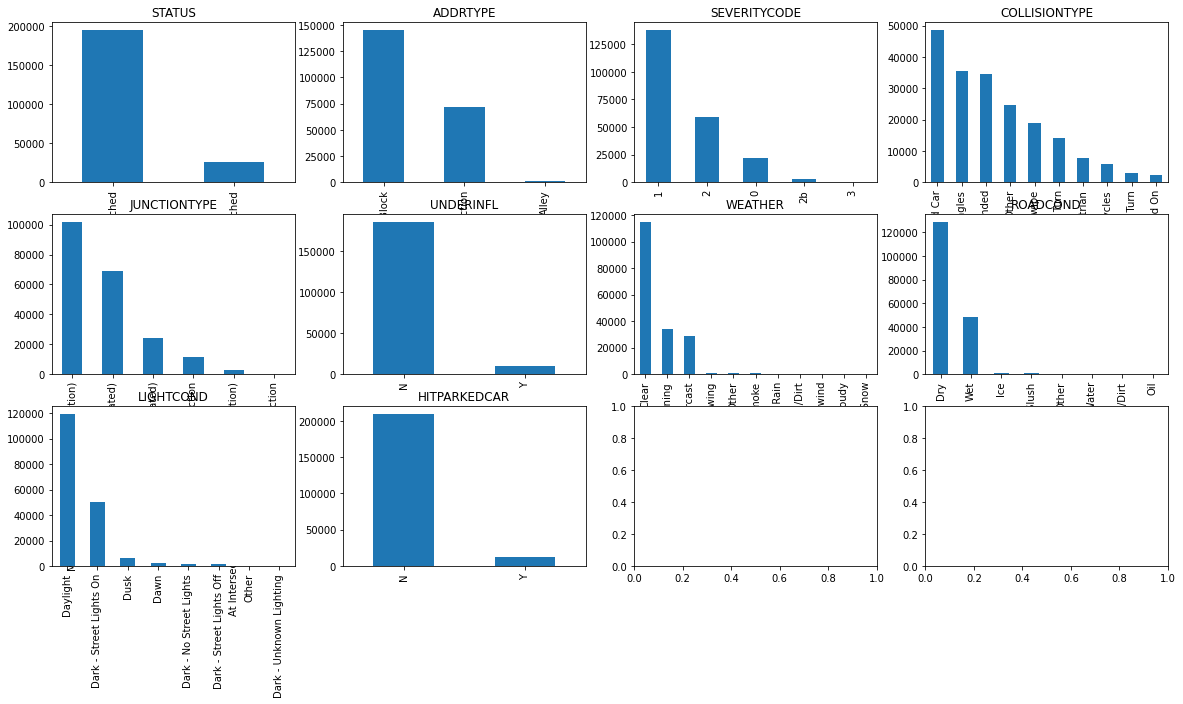

In [148]:
fig, axes = plt.subplots(3,4, figsize=(20,10))
axes = axes.flatten()

i = 0
for t in df.select_dtypes('object').columns:
    df[t].value_counts().plot(kind='bar', ax=axes[i], title=t)
    i +=1

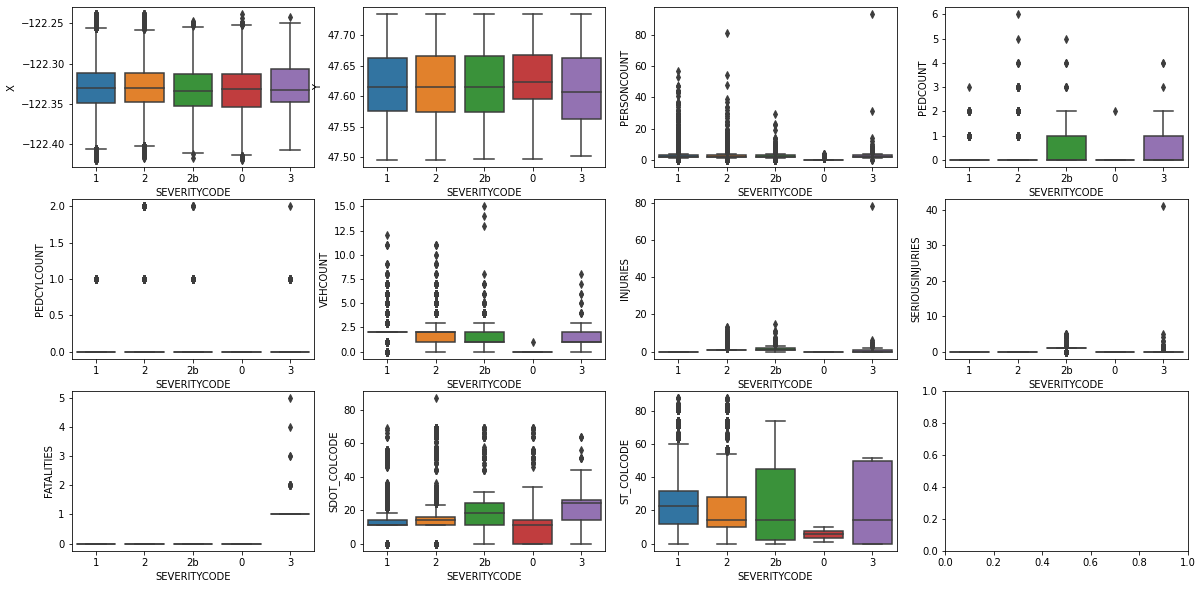

In [150]:
x_var = "SEVERITYCODE"
fig, axes = plt.subplots(3,4, figsize=(20,10))
axes = axes.flatten()

i = 0
for t in df.select_dtypes(['int','float']):
    ax = sns.boxplot(x=x_var, y=t, data=df, ax=axes[i])
    i +=1

# Encode Data
In this part, I will encode the categorical text data to int using OneHotEncoder by scikit-learn.

In [183]:
df_clean[df_clean.select_dtypes('int').columns] = df_clean.select_dtypes('int').fillna(-1)
df_clean = df[df['X'].isna()==False]
df_clean[df_clean.select_dtypes('float').columns] = df_clean.select_dtypes('float').fillna(-1)
df_clean[df_clean.select_dtypes('object').columns] = df_clean.select_dtypes('object').replace(np.nan,'Unknown')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [184]:
df_clean.isna().sum()

X                  0
Y                  0
STATUS             0
ADDRTYPE           0
SEVERITYCODE       0
COLLISIONTYPE      0
PERSONCOUNT        0
PEDCOUNT           0
PEDCYLCOUNT        0
VEHCOUNT           0
INJURIES           0
SERIOUSINJURIES    0
FATALITIES         0
JUNCTIONTYPE       0
SDOT_COLCODE       0
UNDERINFL          0
WEATHER            0
ROADCOND           0
LIGHTCOND          0
ST_COLCODE         0
HITPARKEDCAR       0
dtype: int64

In [158]:
import seaborn as sns

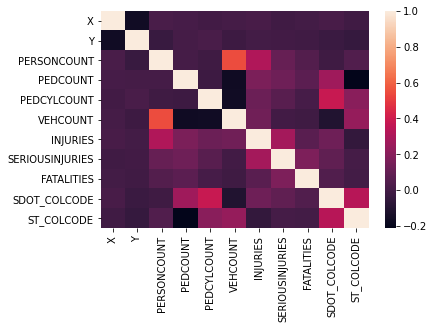

In [159]:
sns.heatmap(df_clean.corr())

In [185]:
Xdata = df_clean.drop(columns='SEVERITYCODE')
y = df_clean['SEVERITYCODE']

In [186]:
X = pd.get_dummies(Xdata, drop_first=True)

In [187]:
from sklearn import preprocessing
data_clean_scaled = preprocessing.StandardScaler().fit(X).transform(X)

In [188]:
print(f"After Delete the NaN values: {X.shape}")
print(f"Before delete the NaN values: {df.shape}")

After Delete the NaN values: (214259, 59)
Before delete the NaN values: (221737, 21)


# Modeling

In [189]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [190]:
X_train, X_test, y_train, y_test = train_test_split(data_clean_scaled,y, test_size=0.65, random_state=42, shuffle=True)

Because the label data is imbalanced, I will balanced it using SMOTE

In [48]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='all')
X_sm, y_sm = smote.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [195]:
y_train.value_counts()/y_train.shape[0]

1     0.625430
2     0.267702
0     0.091572
2b    0.013602
3     0.001694
Name: SEVERITYCODE, dtype: float64

## Testing the best ML Classfier Model
In this part I will use some of Classifier model such as SVM, KNN, Decision tree, etc., after that I will use Random Search method to search the best hyperparameter.

### Random Forest

In [192]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0, max_depth=50)

clf.fit(X_train, y_train)
print(f"Train accuracy: {clf.score(X_train, y_train)}")
print(f"Test accuracy: {clf.score(X_test, y_test)}")

Train accuracy: 0.9999333244432591
Test accuracy: 0.9951245431503063


In [193]:
clf.score(X_test, y_test)

0.9951245431503063

### Neural Networks

In [197]:
X_train.shape

(74990, 59)

In [198]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(256, input_shape=(59,), activation="relu"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse", metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200, batch_size=256)

Epoch 1/200


UnimplementedError: ignored

In [92]:
model.predict(X_test,y_test)

ValueError: ignored